In [1]:
# Import all necessary libraries for data analysis, visualization, ML, and statistics

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, mean_squared_error, r2_score

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Stats
import scipy.stats as stats
import statsmodels.api as sm


In [2]:
df = pd.read_csv("synthetic_shopping_abandonment.csv")
df

,session_id,pages_visited,time_on_site,cart_value,abandoned
0,SID1,12,564,121.26,0
1,SID2,6,210,129.17,0
2,SID3,11,726,139.18,1
3,SID4,14,504,115.23,0
4,SID5,7,413,29.64,0
...,...,...,...,...,...
995,SID996,6,162,107.27,0
996,SID997,10,590,128.54,0
997,SID998,10,590,158.76,0
998,SID999,18,1152,263.60,0


In [3]:
df.shape

(1000, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   session_id     1000 non-null   object 
 1   pages_visited  1000 non-null   int64  
 2   time_on_site   1000 non-null   int64  
 3   cart_value     1000 non-null   float64
 4   abandoned      1000 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 39.2+ KB


In [5]:
df.describe()

,pages_visited,time_on_site,cart_value,abandoned
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,9.904000,445.659000,122.901770,0.098000
std,3.227879,214.710487,61.646463,0.297463
min,1.000000,52.000000,6.580000,0.000000
25%,8.000000,280.000000,74.137500,0.000000
50%,10.000000,411.500000,113.555000,0.000000
75%,12.000000,588.000000,159.700000,0.000000
max,21.000000,1242.000000,383.840000,1.000000


In [6]:
df.isnull().mean()*100

session_id       0.0
pages_visited    0.0
time_on_site     0.0
cart_value       0.0
abandoned        0.0
dtype: float64

In [7]:
# check for duplicates:

df.duplicated().sum()

np.int64(0)

In [8]:
# remove extra spaces from the columns names::
df.columns = df.columns.str.strip()

In [9]:
df.select_dtypes(include=['number']).corr()

,pages_visited,time_on_site,cart_value,abandoned
pages_visited,1.000000,0.711265,0.657943,0.212057
time_on_site,0.711265,1.000000,0.492895,0.366955
cart_value,0.657943,0.492895,1.000000,-0.118018
abandoned,0.212057,0.366955,-0.118018,1.000000


## EDA (Explorartory Data Analysis):

#### Checking for the data distribution

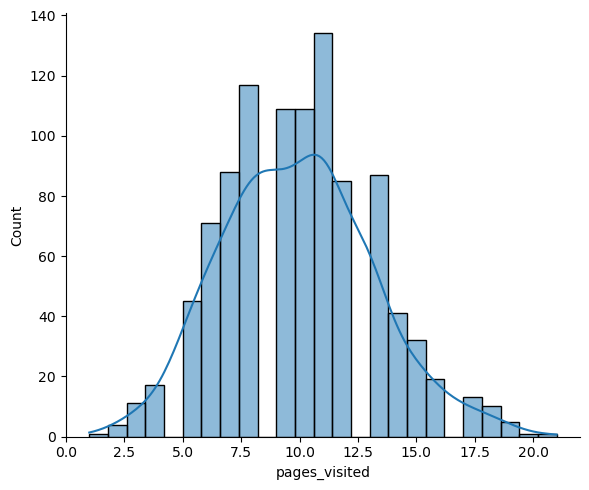

In [10]:
## numerical data:

sns.displot(df['pages_visited'], kde=True, height=5, aspect=1.2)
plt.show()

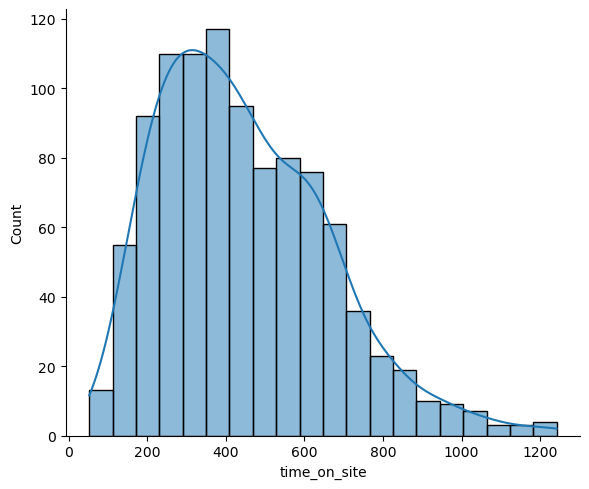

In [11]:
sns.displot(df['time_on_site'], kde=True, height=5, aspect=1.2)
plt.show()

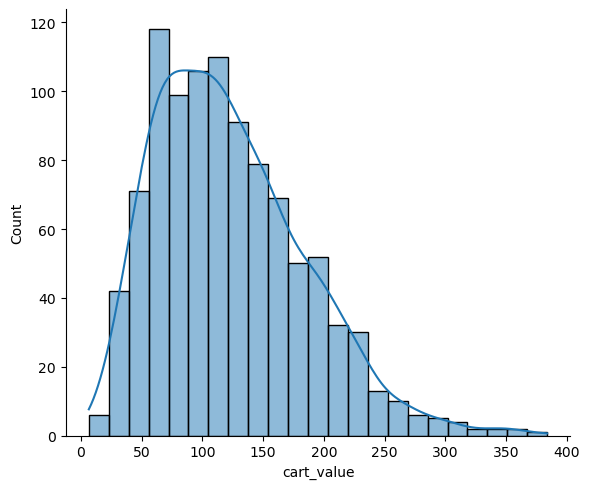

In [12]:
sns.displot(df['cart_value'], kde=True, height=5, aspect=1.2)
plt.show()

## Checking for outliers:

In [13]:
def boxplot(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns[:-1]
    
    for col in numerical_cols:
        plt.figure(figsize=(5, 4))
        sns.boxplot(x=df[col], color='lightblue')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

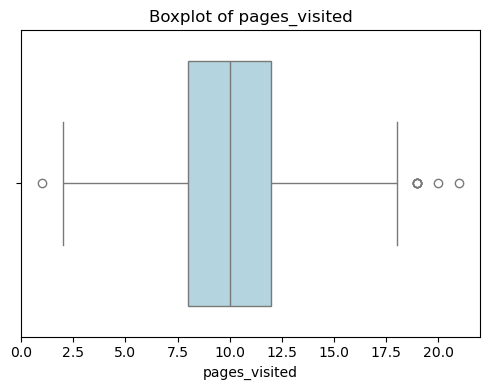

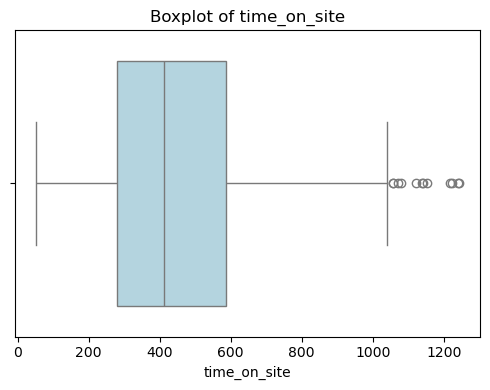

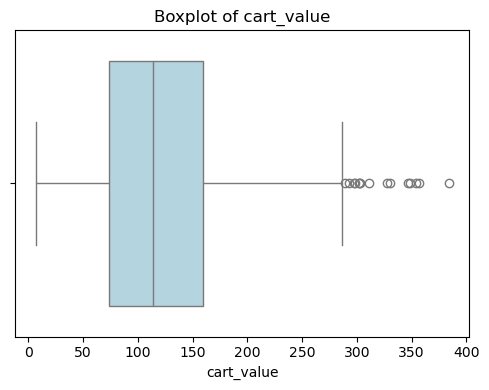

In [14]:
## not using "abandoned" column because it is a binary column which cannot be boxplotted
boxplot(df)

In [15]:
df['abandoned'].value_counts()

abandoned
0    902
1     98
Name: count, dtype: int64

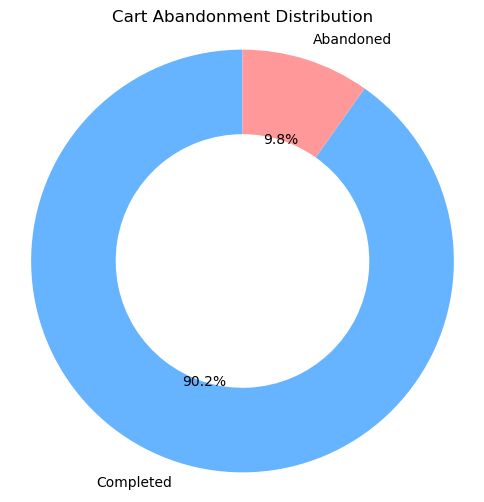

In [16]:
import matplotlib.pyplot as plt

# Count values
abandon_counts = df['abandoned'].value_counts()

# Labels for chart
labels = ['Completed', 'Abandoned'] if 0 in abandon_counts.index else abandon_counts.index

# Colors (optional)
colors = ['#66b3ff', '#ff9999']

# Plot doughnut chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    abandon_counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4)  # width<1 makes it a doughnut
)

# Equal aspect ratio ensures the pie is drawn as a circle
ax.axis('equal')

# Title
plt.title('Cart Abandonment Distribution')

plt.show()


In [17]:
df.columns

Index(['session_id', 'pages_visited', 'time_on_site', 'cart_value',
       'abandoned'],
      dtype='object')

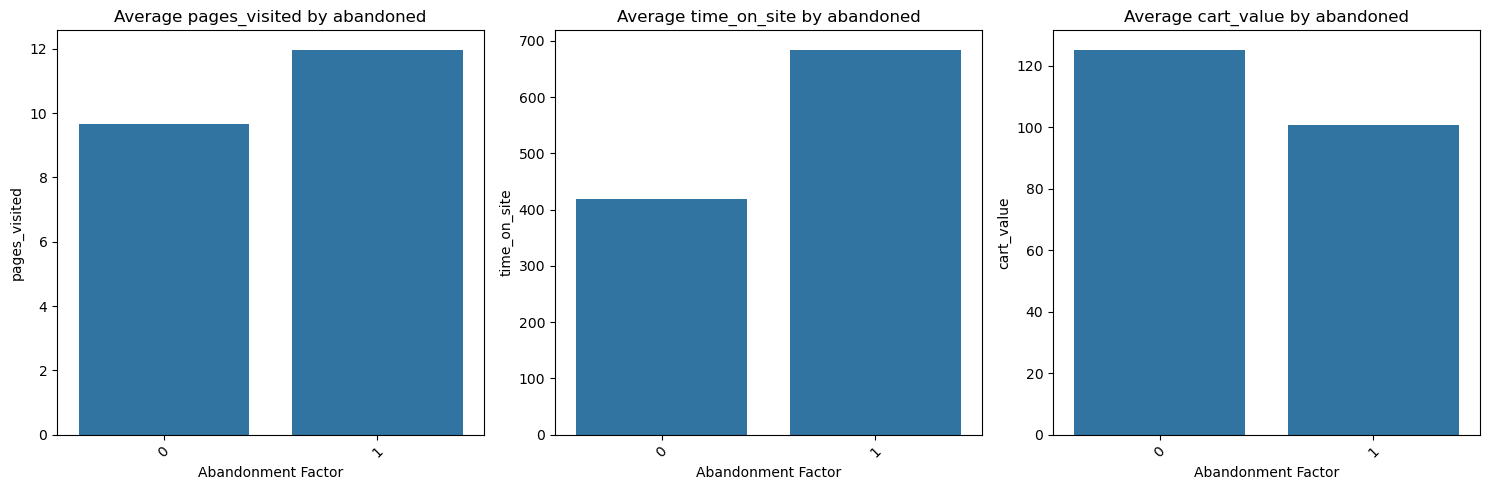

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['pages_visited', 'time_on_site', 'cart_value']
cat_col = 'abandoned'  # make sure this matches your dataframe exactly

plt.figure(figsize=(15, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns
    sns.barplot(x=cat_col, y=col, data=df, estimator='mean', errorbar=None)
    plt.title(f'Average {col} by {cat_col}')
    plt.xticks(rotation=45)
    plt.ylabel(col)
    plt.xlabel('Abandonment Factor')

plt.tight_layout()
plt.show()


In [19]:
df['time_on_site_min'] = df['time_on_site'] / 60
avg_session_per_customer = df.groupby('session_id')['time_on_site_min'].mean().mean()
print(f"Average Session Duration per Customer: {avg_session_per_customer:.2f} minutes")


Average Session Duration per Customer: 7.43 minutes


## Bivariate Analysis:

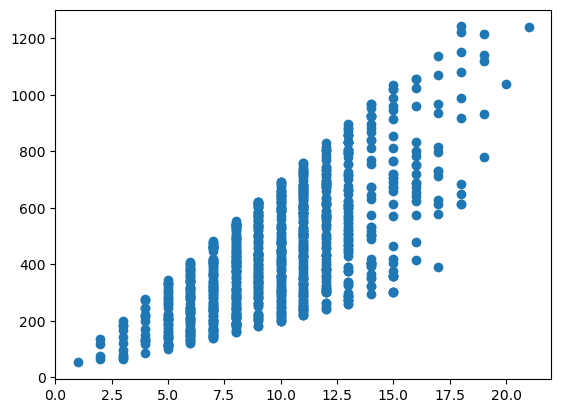

In [20]:
## scatter plot for bivariate numerical analysis

plt.scatter(x = df['pages_visited'], y = df['time_on_site'])
plt.show()

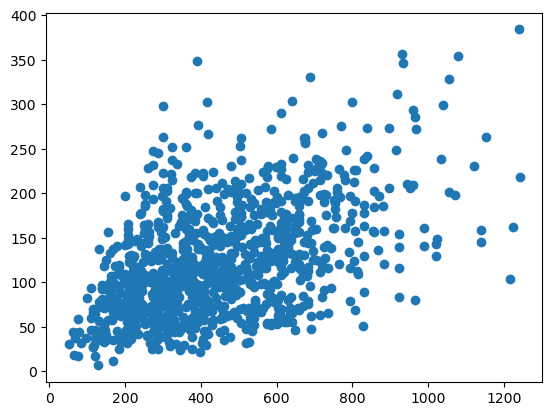

In [21]:
## scatter plot for bivariate numerical analysis

plt.scatter(x = df['time_on_site'], y = df['cart_value'])
plt.show()

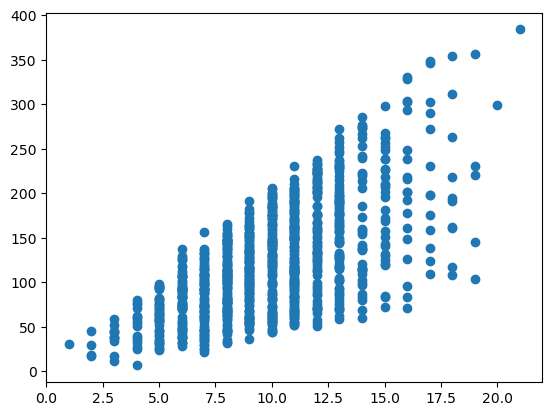

In [22]:
## scatter plot for bivariate numerical analysis

plt.scatter(x = df['pages_visited'], y = df['cart_value'])
plt.show()

In [23]:
def scatter_pairs(df):
    pairs = [
        ('pages_visited', 'time_on_site'),
        ('pages_visited', 'cart_value'),
        ('time_on_site', 'cart_value')
    ]
    
    for x, y in pairs:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=x, y=y, hue='abandoned', palette='Set1')  # color-coded by target
        plt.title(f'Scatter Plot: {x} vs {y}')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.tight_layout()
        plt.show()


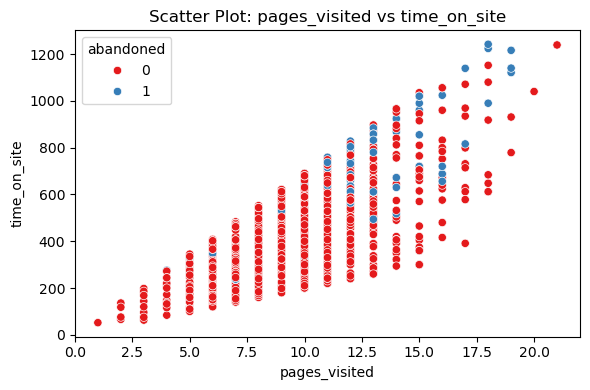

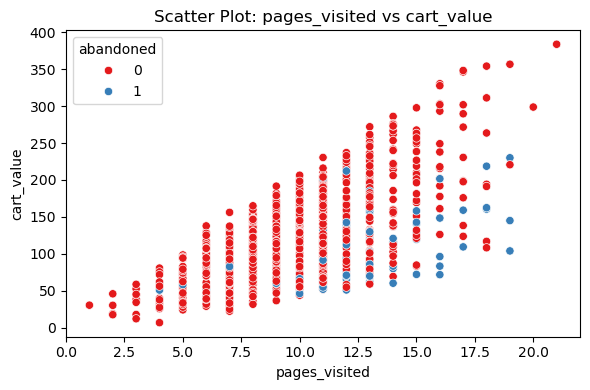

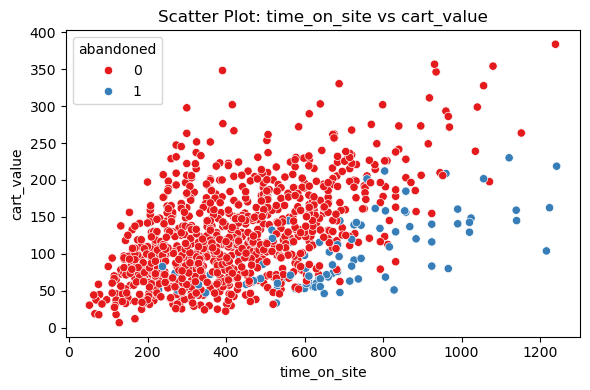

In [24]:
scatter_pairs(df)

<Axes: ylabel='count'>

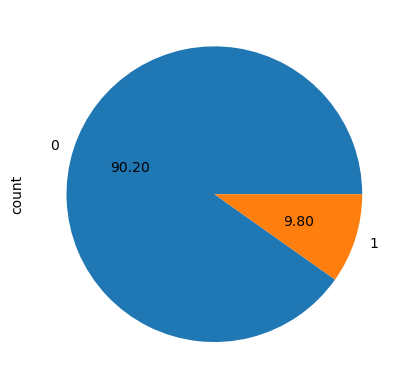

In [25]:
## plotting pie chart  for abandonment columns for better analysis:
df['abandoned'].value_counts().plot(kind = 'pie', autopct = '%.2f')

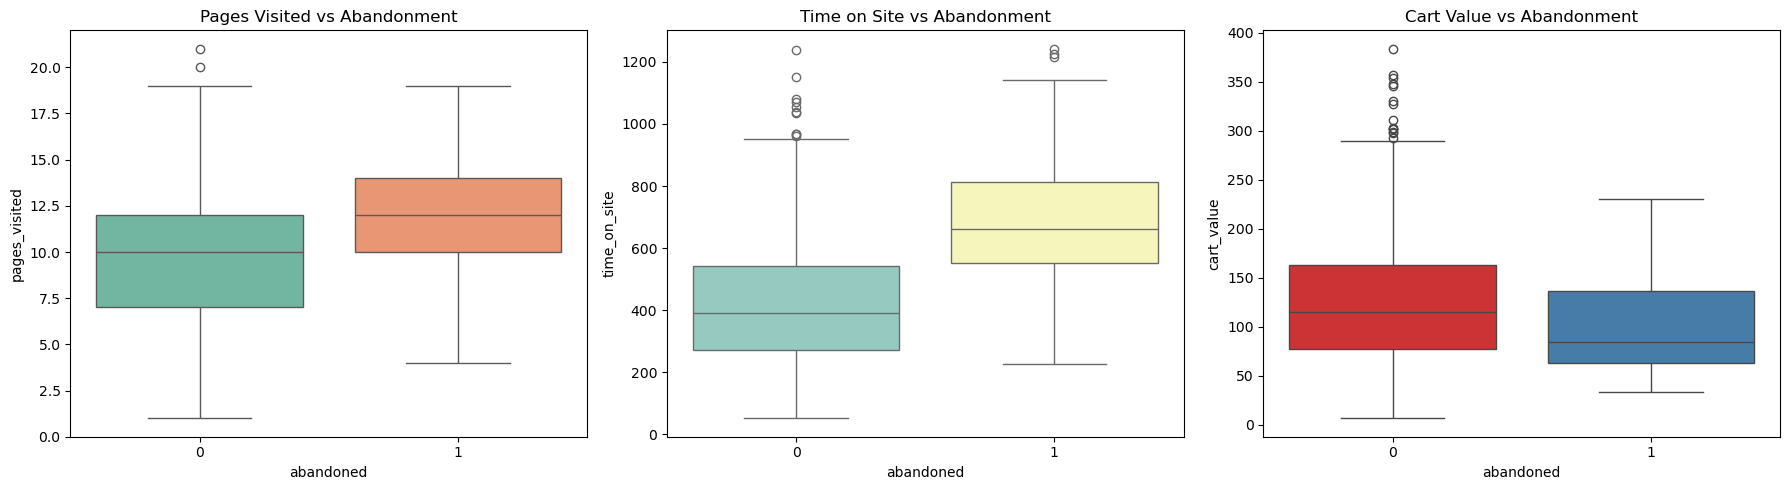

In [26]:
plt.figure(figsize=(18, 5))

# Plot 1: pages_visited
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='abandoned', y='pages_visited', hue='abandoned', palette='Set2', legend=False)
plt.title('Pages Visited vs Abandonment')

# Plot 2: time_on_site
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='abandoned', y='time_on_site', hue='abandoned', palette='Set3', legend=False)
plt.title('Time on Site vs Abandonment')

# Plot 3: cart_value
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='abandoned', y='cart_value', hue='abandoned', palette='Set1', legend=False)
plt.title('Cart Value vs Abandonment')

plt.tight_layout()
plt.show()


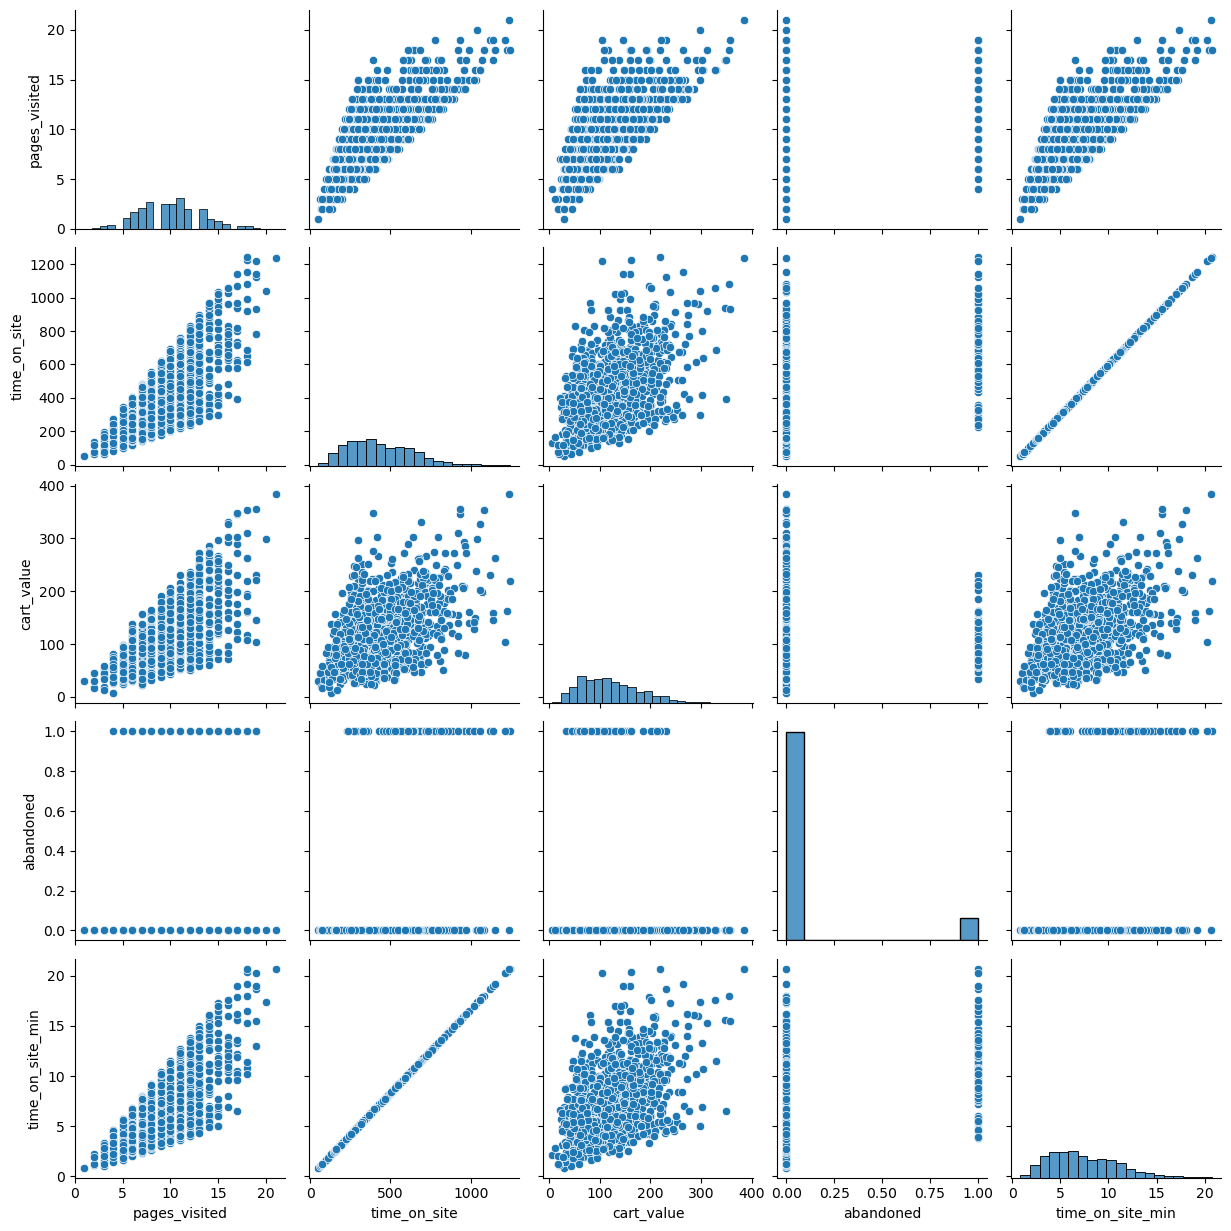

In [27]:
sns.pairplot(df)
plt.show()

In [28]:
def scatter_pairs(df):
    pairs = [
        ('pages_visited', 'time_on_site'),
        ('pages_visited', 'cart_value'),
        ('time_on_site', 'cart_value')
    ]
    
    for x, y in pairs:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=x, y=y, hue='abandoned', palette='Set1')  # color-coded by target
        plt.title(f'Scatter Plot: {x} vs {y}')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.tight_layout()
        plt.show()


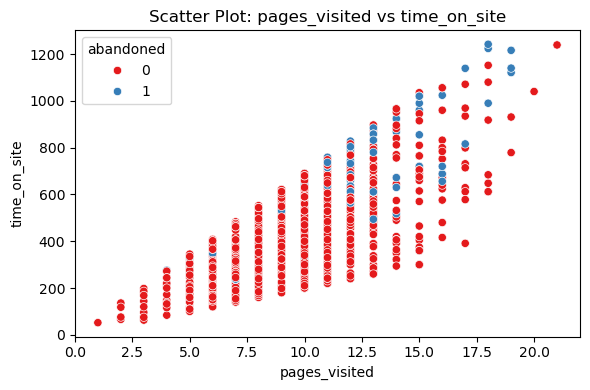

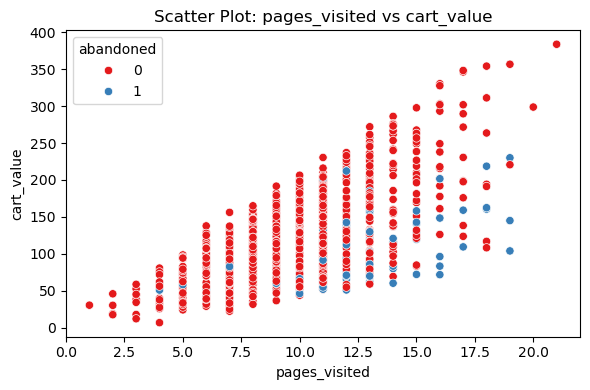

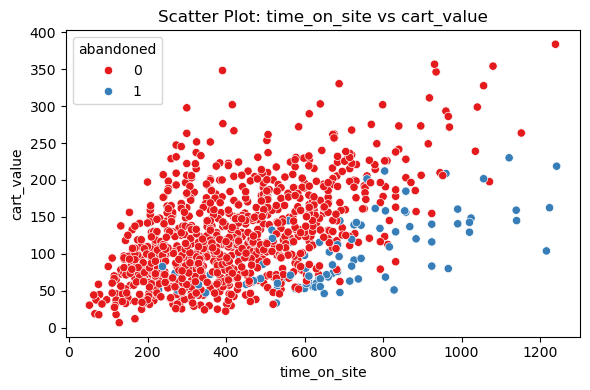

In [29]:
scatter_pairs(df)

## Feature Engineering 

In [30]:
X = df[['cart_value', 'pages_visited','time_on_site']]  # use actual features here
y = df['abandoned']  # target column (must be binary: 0 or 1)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [32]:
# standard_scaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
##3 converting nupmy arrays into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
np.round(X_train.describe(),1)

,cart_value,pages_visited,time_on_site
count,700.0,700.0,700.0
mean,124.0,10.0,454.6
std,62.0,3.2,216.6
min,6.6,1.0,52.0
25%,76.6,8.0,288.0
50%,114.3,10.0,426.0
75%,161.6,12.0,598.0
max,383.8,21.0,1242.0


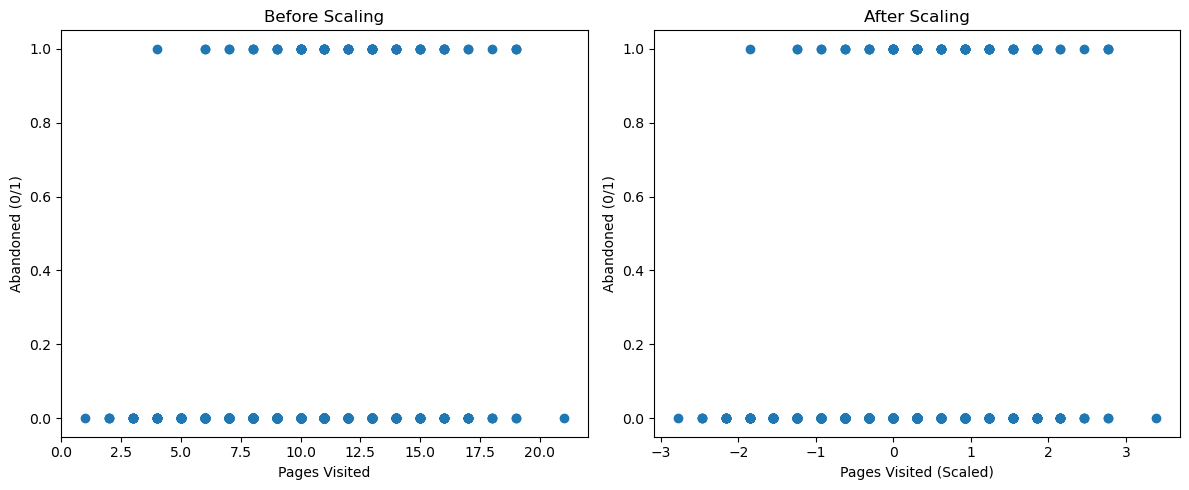

In [34]:
import matplotlib.pyplot as plt

# Create subplots with 2 columns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot before scaling (X_train vs Y_train)
ax1.scatter(X_train['pages_visited'], Y_train)
ax1.set_title("Before Scaling")
ax1.set_xlabel("Pages Visited")
ax1.set_ylabel("Abandoned (0/1)")

# Plot after scaling (X_train_scaled vs Y_train)
ax2.scatter(X_train_scaled['pages_visited'], Y_train)
ax2.set_title("After Scaling")
ax2.set_xlabel("Pages Visited (Scaled)")
ax2.set_ylabel("Abandoned (0/1)")

plt.tight_layout()
plt.show()


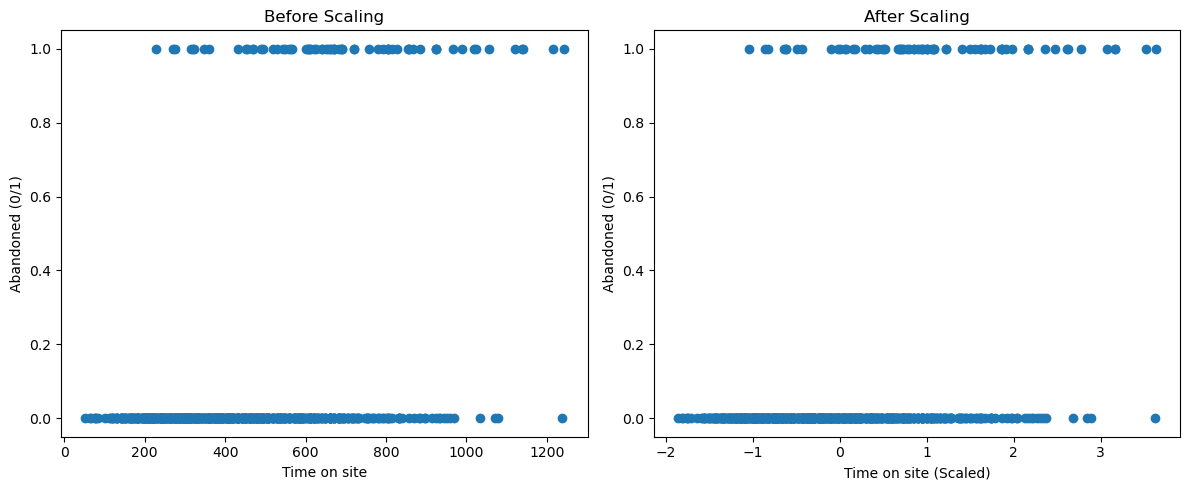

In [35]:

# Create subplots with 2 columns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot before scaling (X_train vs Y_train)
ax1.scatter(X_train['time_on_site'], Y_train)
ax1.set_title("Before Scaling")
ax1.set_xlabel("Time on site")
ax1.set_ylabel("Abandoned (0/1)")

# Plot after scaling (X_train_scaled vs Y_train)
ax2.scatter(X_train_scaled['time_on_site'], Y_train)
ax2.set_title("After Scaling")
ax2.set_xlabel("Time on site (Scaled)")
ax2.set_ylabel("Abandoned (0/1)")

plt.tight_layout()
plt.show()


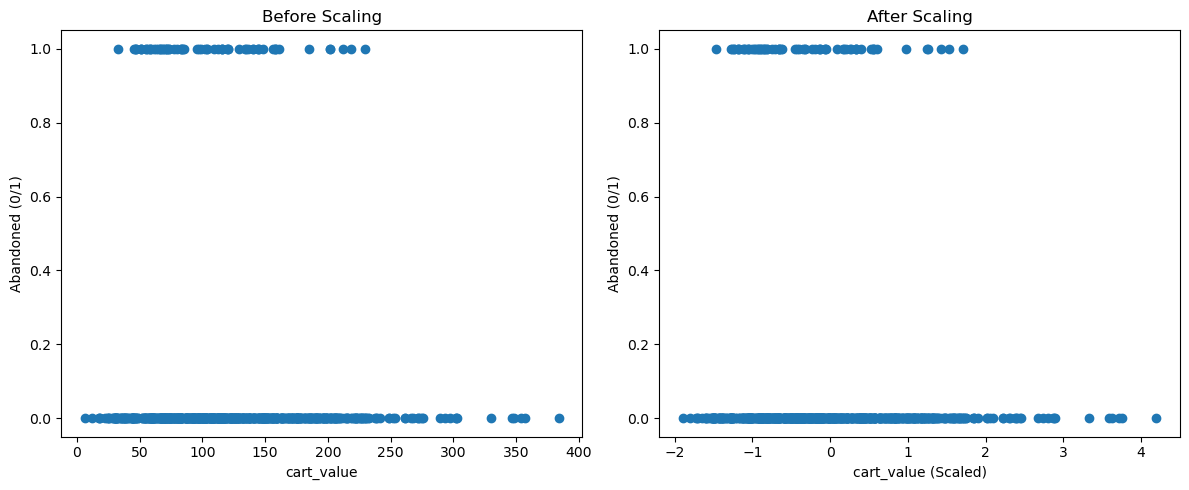

In [36]:
# Create subplots with 2 columns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot before scaling (X_train vs Y_train)
ax1.scatter(X_train['cart_value'], Y_train)
ax1.set_title("Before Scaling")
ax1.set_xlabel("cart_value")
ax1.set_ylabel("Abandoned (0/1)")

# Plot after scaling (X_train_scaled vs Y_train)
ax2.scatter(X_train_scaled['cart_value'], Y_train)
ax2.set_title("After Scaling")
ax2.set_xlabel("cart_value (Scaled)")
ax2.set_ylabel("Abandoned (0/1)")

plt.tight_layout()
plt.show()


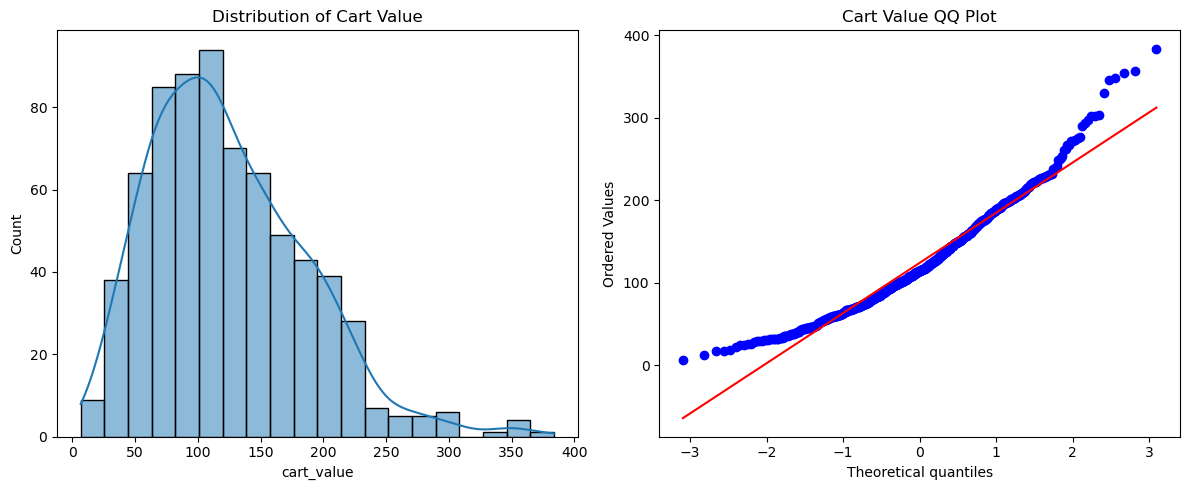

In [37]:
plt.figure(figsize=(12, 5))  # Width x Height in inches

# Subplot 1: Histogram + KDE
plt.subplot(1, 2, 1)
sns.histplot(X_train['cart_value'], kde=True)
plt.title("Distribution of Cart Value")

# Subplot 2: QQ Plot
plt.subplot(1, 2, 2)
stats.probplot(X_train['cart_value'], dist="norm", plot=plt)
plt.title('Cart Value QQ Plot')

plt.tight_layout()
plt.show()


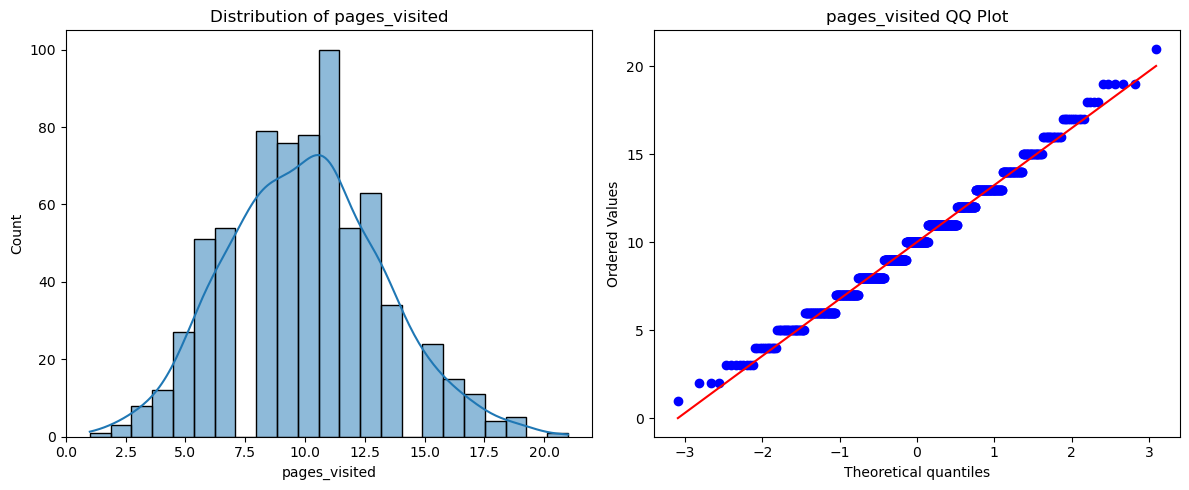

In [38]:
# Create a figure with specified size
plt.figure(figsize=(12, 5))  # Width x Height in inches

# Subplot 1: Histogram + KDE
plt.subplot(1, 2, 1)
sns.histplot(X_train['pages_visited'], kde=True)
plt.title("Distribution of pages_visited")

# Subplot 2: QQ Plot
plt.subplot(1, 2, 2)
stats.probplot(X_train['pages_visited'], dist="norm", plot=plt)
plt.title('pages_visited QQ Plot')

plt.tight_layout()
plt.show()


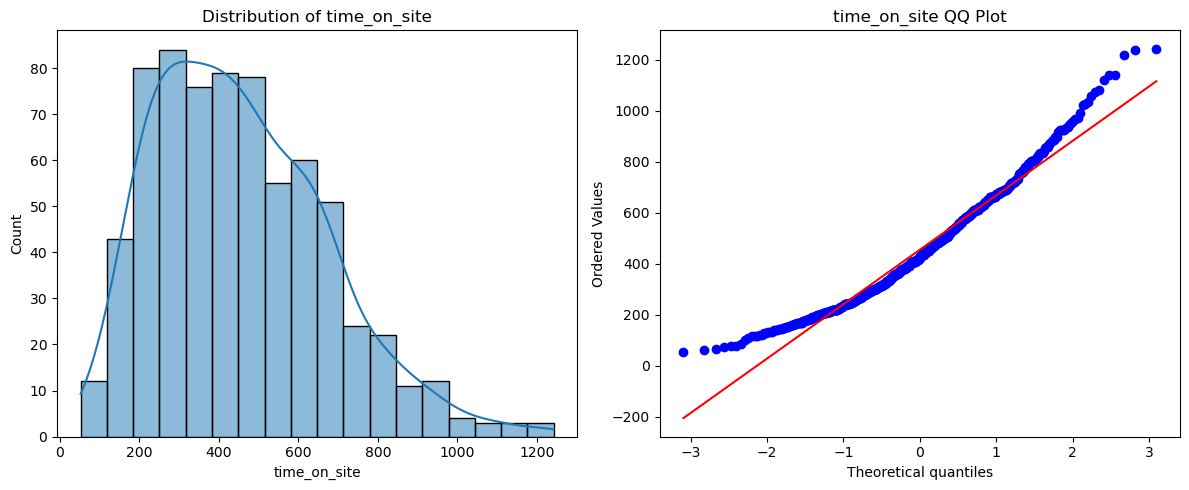

In [39]:
# Create a figure with specified size
plt.figure(figsize=(12, 5))  # Width x Height in inches

# Subplot 1: Histogram + KDE
plt.subplot(1, 2, 1)
sns.histplot(X_train['time_on_site'], kde=True)
plt.title("Distribution of time_on_site")

# Subplot 2: QQ Plot
plt.subplot(1, 2, 2)
stats.probplot(X_train['time_on_site'], dist="norm", plot=plt)
plt.title('time_on_site QQ Plot')

plt.tight_layout()
plt.show()


### Building Pipelines

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Select features and target
X = df[['cart_value', 'pages_visited', 'time_on_site']]
y = df['abandoned']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 3. Log transformation (for skewed numeric columns)
log_columns = ['cart_value', 'time_on_site']
pass_columns = ['pages_visited']

log_transformer = FunctionTransformer(np.log1p)

# 4. Column transformer to apply log only on selected columns
column_trf = ColumnTransformer([
    ('log', log_transformer, log_columns),
    ('pass', 'passthrough', pass_columns)
])

# 5. Decision Tree Pipeline (no need to scale or select features for trees, but kept for consistency)
pipe = Pipeline([
    ('column_transform', column_trf),
    # Scaling is optional for trees; won't affect performance but kept here if reusing structure
    ('scaler', StandardScaler()),
    # Feature selection not necessary for trees but included if desired
    ('selector', SelectKBest(score_func=f_classif, k=3)),
    ('model', DecisionTreeClassifier(criterion='gini',class_weight='balanced', random_state=0, max_depth=4, 
                                     min_samples_split = 2,  min_samples_leaf = 1, max_features = 1,
                                 max_leaf_nodes = 5, min_impurity_decrease = 0.0
                                    ))  # You can tune depth
])


# 6. Train the model
pipe.fit(X_train, y_train)

# 7. Predict
y_pred = pipe.predict(X_test)

# 8. Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       272
           1       0.45      0.68      0.54        28

    accuracy                           0.89       300
   macro avg       0.71      0.80      0.74       300
weighted avg       0.92      0.89      0.90       300

Confusion Matrix:
 [[249  23]
 [  9  19]]


In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# 1. Select features and target
X = df[['cart_value', 'pages_visited', 'time_on_site']]
y = df['abandoned']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 3. Log transformation (for skewed numeric columns)
log_columns = ['cart_value', 'time_on_site']
pass_columns = ['pages_visited']

log_transformer = FunctionTransformer(np.log1p)

# 4. Column transformer to apply log only on selected columns
column_trf = ColumnTransformer([
    ('log', log_transformer, log_columns),
    ('pass', 'passthrough', pass_columns)
])

# 5. Logistic Regression Pipeline
pipe = Pipeline([
    ('column_transform', column_trf),
    ('scaler', StandardScaler()),  # Scaling needed for logistic regression
    ('selector', SelectKBest(score_func=f_classif, k=3)),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0))
])

# 6. Train the model
pipe.fit(X_train, y_train)

# 7. Predict
y_pred = pipe.predict(X_test)
y_prob = pipe.predict_proba(X_test)[:, 1]

# 8. Evaluation - all metrics together
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("=== Model Evaluation Metrics ===")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1-Score     : {f1:.4f}")
print(f"ROC-AUC      : {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== Model Evaluation Metrics ===
Accuracy     : 0.8400
Precision    : 0.3529
Recall       : 0.8571
F1-Score     : 0.5000
ROC-AUC      : 0.9119

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90       272
           1       0.35      0.86      0.50        28

    accuracy                           0.84       300
   macro avg       0.67      0.85      0.70       300
weighted avg       0.92      0.84      0.87       300

Confusion Matrix:
 [[228  44]
 [  4  24]]


In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import Pipeline  # from imblearn, not sklearn
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# 1. Select features and target
X = df[['cart_value', 'pages_visited', 'time_on_site']]
y = df['abandoned']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# 3. Log transformation
log_columns = ['cart_value', 'time_on_site']
pass_columns = ['pages_visited']
log_transformer = FunctionTransformer(np.log1p)

# 4. Column transformer
column_trf = ColumnTransformer([
    ('log', log_transformer, log_columns),
    ('pass', 'passthrough', pass_columns)
])

# 5. Pipeline with Random Oversampling
pipe = Pipeline([
    ('column_transform', column_trf),
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=3)),
    ('oversample', RandomOverSampler(random_state=42)),  # Random Oversampling
    ('model', DecisionTreeClassifier(
        criterion='gini',
        class_weight='balanced',  # optional, still helps
        random_state=0,
        max_depth=4,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features=1,
        max_leaf_nodes=5,
        min_impurity_decrease=0.0
    ))
])

# 6. Fit the pipeline on training data
pipe.fit(X_train, y_train)

# 7. Predict on test data
y_pred = pipe.predict(X_test)

# 8. Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       272
           1       0.46      0.68      0.55        28

    accuracy                           0.90       300
   macro avg       0.71      0.80      0.75       300
weighted avg       0.92      0.90      0.91       300

Confusion Matrix:
 [[250  22]
 [  9  19]]


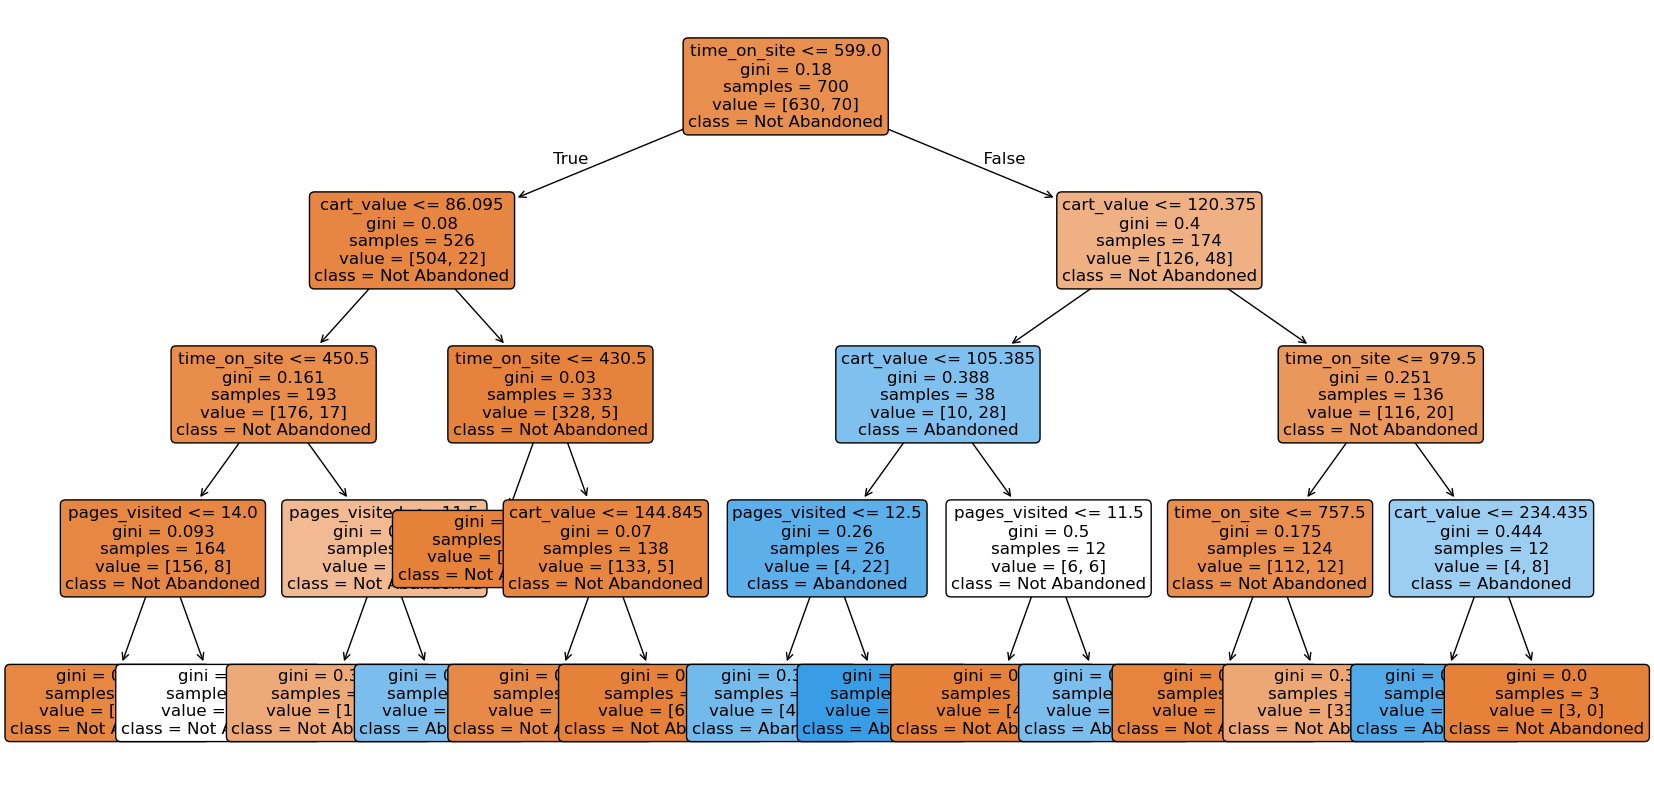

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Fit your model (example)
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, 
          feature_names=X_train.columns, 
          class_names=['Not Abandoned', 'Abandoned'],  # 0 and 1 class labels
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.show()


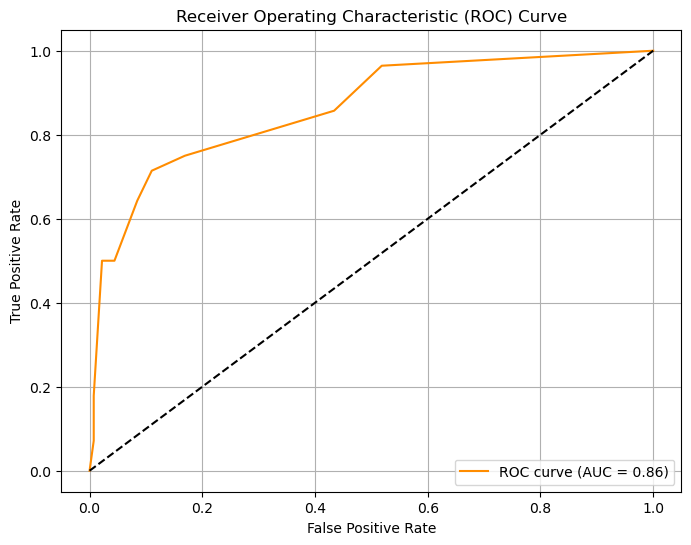

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = clf.predict_proba(X_test)[:, 1]  # Probability for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


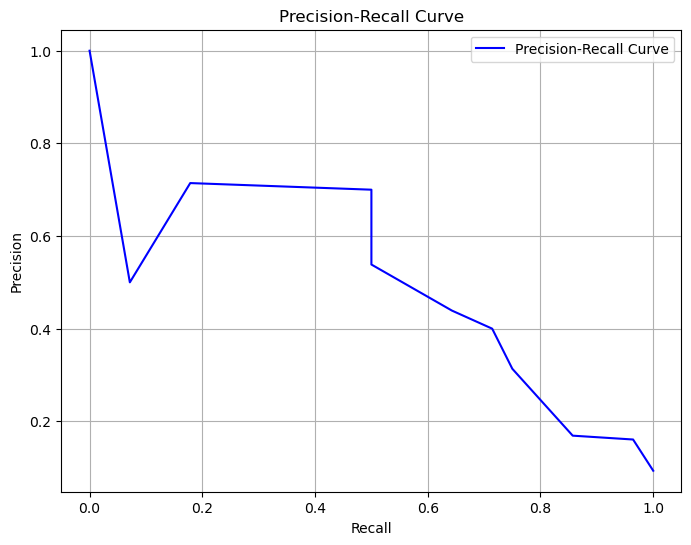

In [45]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='blue', label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.legend()
plt.show()


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def analyzer(max_depth, fixed_pages_visited=5):
    # Load dataset
    df = pd.read_csv("synthetic_shopping_abandonment.csv")  # Update path if needed

    # Features & target
    X = df[['time_on_site', 'cart_value', 'pages_visited']].values
    y = df['abandoned'].values

    # Train decision tree
    clf = DecisionTreeClassifier(
        max_depth=max_depth,
        class_weight='balanced',
        min_samples_split=10,
        min_samples_leaf=5,
        max_features=1,
        random_state=0
    )
    clf.fit(X, y)

    # Prepare 2D meshgrid for time_on_site and cart_value
    a = np.arange(start=X[:, 0].min() - 1, stop=X[:, 0].max() + 1, step=10)
    b = np.arange(start=X[:, 1].min() - 100, stop=X[:, 1].max() + 100, step=20)
    XX, YY = np.meshgrid(a, b)

    # Construct input for prediction using fixed pages_visited
    fixed_feature = np.full_like(XX.ravel(), fill_value=fixed_pages_visited)
    input_array = np.c_[XX.ravel(), YY.ravel(), fixed_feature]

    # Predict over the grid
    labels = clf.predict(input_array)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.4, cmap=plt.cm.Pastel2)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.plasma, edgecolor='k', s=40)

    plt.title(f"Decision Tree (max_depth={max_depth}) - Cart Abandonment (pages_visited={fixed_pages_visited})", fontsize=14)
    plt.xlabel("Time on Site")
    plt.ylabel("Cart Value")
    plt.grid(True)
    plt.tight_layout()
    plt.colorbar(scatter, label="Abandonment (0 = No, 1 = Yes)")
    plt.show()


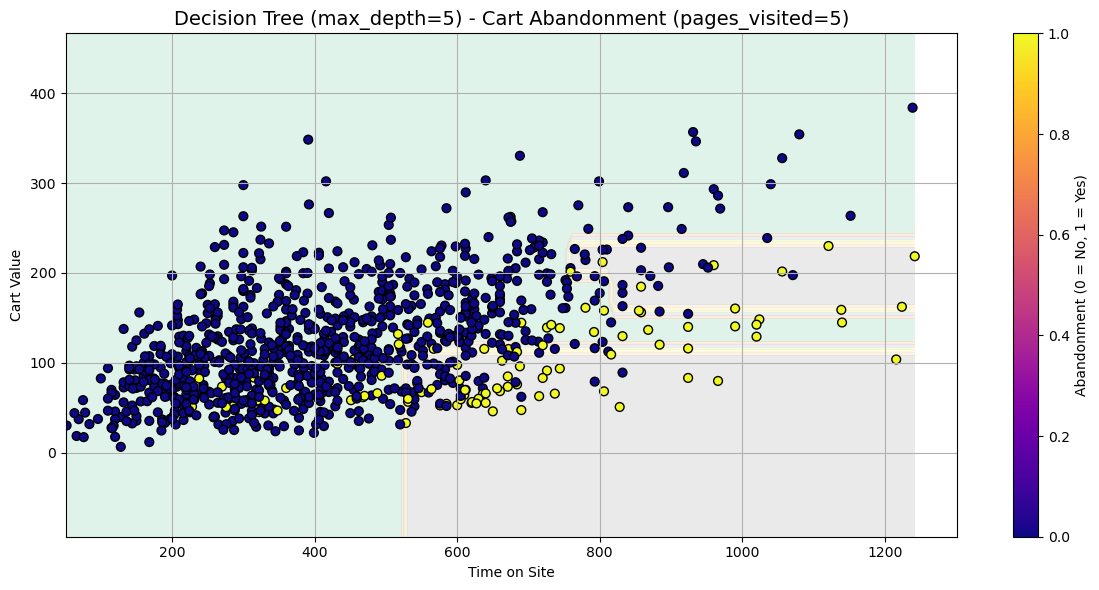

In [47]:
analyzer(max_depth = 5, fixed_pages_visited=5)

# Checking Model Metrics

In [48]:
# # min_samples_split = 5, min_samples_leaf = 2, max_features = 1

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

# Predict on test set
y_pred = pipe.predict(X_test)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# Accuracy (optional)
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred)

# Display
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)


Accuracy: 0.8966666666666666
Precision: 0.4634146341463415
Recall: 0.6785714285714286
F1 Score: 0.5507246376811594

Confusion Matrix:
 [[250  22]
 [  9  19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       272
           1       0.46      0.68      0.55        28

    accuracy                           0.90       300
   macro avg       0.71      0.80      0.75       300
weighted avg       0.92      0.90      0.91       300



## Model Optimization (GridSearchCV)


In [50]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8966666666666666


## Model Deployment (Pickle the model)

In [51]:
import pickle

# Save model
with open('cart_abandonment_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Load model
# with open('cart_abandonment_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)
#     y_pred = loaded_model.predict(X_test)


NameError: name 'best_model' is not defined

# K - means 

In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*KMeans is known to have a memory leak.*")


In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = "4"

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Feature selection
X = df[['pages_visited', 'time_on_site', 'cart_value']]

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Elbow method to choose optimal K
inertia = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
# Select only numeric columns
X = df.select_dtypes(include='number')

# Optionally scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=42)
y_means = km.fit_predict(X_scaled)
print(y_means)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Feature selection
X = df[[ 'time_on_site', 'cart_value']]

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fit KMeans with 4 clusters (you can update the number)
km = KMeans(n_clusters=4, random_state=0)
y_means = km.fit_predict(X_scaled)

# 4. Scatter plot using first two features: pages_visited vs time_on_site
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[y_means == 0, 0], X_scaled[y_means == 0, 1], color='blue', label='Cluster 0')
plt.scatter(X_scaled[y_means == 1, 0], X_scaled[y_means == 1, 1], color='red', label='Cluster 1')
plt.scatter(X_scaled[y_means == 2, 0], X_scaled[y_means == 2, 1], color='green', label='Cluster 2')
plt.scatter(X_scaled[y_means == 3, 0], X_scaled[y_means == 3, 1], color='purple', label='Cluster 3')

# Optional: show cluster centers
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=300, c='black', marker='X', label='Centroids')

plt.xlabel('cart_value')
plt.ylabel('Time on Site (scaled)')
plt.title('Customer Segmentation using KMeans')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Assuming k=3 (choose based on elbow plot)
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 4. Visualize clusters
sns.scatterplot(data=df, x='time_on_site', y='cart_value', hue='cluster', palette='Set1')
plt.title('User Segmentation: Time vs Cart Value')
plt.show()


In [ ]:
import pandas as pd

df_clusters = pd.DataFrame(X, columns=['time_on_site','cart_value'])
df_clusters['cluster'] = kmeans.labels_

print(df_clusters.groupby('cluster').mean())  # Average values per cluster
print(df_clusters.groupby('cluster').size())  # Cluster sizes


In [ ]:
# Overall average cart value
avg_cart_value = df['cart_value'].mean()
print(f"Average Cart Value: ₹{avg_cart_value:.2f}")


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_score = silhouette_score(X, kmeans.labels_)
db_score = davies_bouldin_score(X, kmeans.labels_)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Score:", db_score)




| Cluster   | Behavior Interpretation                                     |
| --------- | ----------------------------------------------------------- |
| 0 (Red)   | Medium time, medium cart value – **potential buyers**       |
| 1 (Blue)  | Low time, low cart value – **window shoppers**              |
| 2 (Green) | High time, high cart value – **engaged, high-intent users** |


In [ ]:
# Add cluster column to original data
df['cluster'] = kmeans.labels_

# Get cluster-wise statistics
cluster_profile = df.groupby('cluster')[['pages_visited', 'time_on_site', 'cart_value']].mean()
display(cluster_profile)


### Interpretation Example:

- Cluster 0: Low time, low cart → "Uninterested users"

- Cluster 1: High pages, high time, medium cart → "Explorers"

- Cluster 2: Medium pages, high cart → "Potential buyers"



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2D plot
sns.scatterplot(data=df, x='pages_visited', y='cart_value', hue='cluster', palette='Set1')
plt.title("User Segments: Pages Visited vs Cart Value")
plt.show()


In [ ]:
sns.pairplot(df[['pages_visited', 'time_on_site', 'cart_value', 'cluster']], hue='cluster')


Here’s how you can turn your **K-Means results** into clear, interview-ready **insights** for the cart abandonment project.

---

## **📊 Cluster Profiling & Insights**

### **Cluster 0**

* **Avg Time on Site:** \~648 sec (≈ 10.8 min)
* **Avg Cart Value:** ₹211
* **Size:** 224 users
* **Insight:** These are **high-engagement, high-value shoppers**. They browse for a long time and add expensive items. They are likely *serious buyers*, but if they abandon, the loss is big.
* **Recommendation:**

  * Send *limited-time discount* emails or free shipping offers.
  * Use urgency tactics (countdown timers).
  * Offer personalized checkout reminders.

---

### **Cluster 1**

* **Avg Time on Site:** \~553 sec (≈ 9.2 min)
* **Avg Cart Value:** ₹113
* **Size:** 323 users
* **Insight:** **Moderate engagement, medium cart value**. These shoppers might be browsing a few items but aren’t filling the cart much.
* **Recommendation:**

  * Cross-sell and upsell relevant products.
  * Offer “Spend ₹XXX more to get free shipping” incentives.
  * Show bundle offers.

---

### **Cluster 2**

* **Avg Time on Site:** \~269 sec (≈ 4.5 min)
* **Avg Cart Value:** ₹86
* **Size:** 453 users
* **Insight:** **Low engagement, low cart value** — likely casual browsers or first-time visitors. Highest abandonment risk.
* **Recommendation:**

  * Retarget with ads and coupons.
  * Use gamified engagement (spin-the-wheel discounts).
  * Improve product recommendations to catch interest faster.

---

## **🔍 Overall Business Insights**

1. **Most users (453) are low-engagement, low-spend** → bulk of abandonment is here. Need strong retargeting.
2. **High-value users are the smallest group (224)** but critical for revenue — even small abandonment reduction here will have a big impact.
3. **Mid-tier users (323)** can be nudged toward higher spending with targeted offers.
4. **Silhouette score (0.33)** shows moderate cluster separation — segmentation is useful but there’s overlap, so use multiple strategies in parallel.




### 📊 Cluster Profiles (Mean Values):

| Cluster | Pages Visited | Time on Site (s) | Cart Value |
| ------- | ------------- | ---------------- | ---------- |
| **0**   | 10.82         | 478.97           | ₹132.11    |
| **1**   | 6.87          | 272.53           | ₹76.03     |
| **2**   | 14.45         | 758.86           | ₹207.16    |

---

## 🔍 Q1: **Which cluster has high cart value but high abandonment?**

We need to look at cart value **and whether they are likely to abandon**. Based on intuition and business logic:

* High **cart\_value** but **possibly not converting** indicates **lost opportunity**.
* Cluster **2** has the **highest cart value (₹207.16)** and **longest time on site**.

✅ **Answer**: **Cluster 2** has high cart value and long browsing time. If abandonment rate in this cluster is also high (you can check % of abandoned = 1 within this cluster), it means users are very interested but not converting — **perfect for retargeting**.

---

## 🔍 Q2: **Which cluster spends a long time but buys little?**

We are looking for **high `time_on_site`** and **low `cart_value`**.

* Cluster 0: time = 479s, cart = ₹132
* Cluster 1: time = 273s, cart = ₹76
* Cluster 2: time = **759s**, cart = **₹207**

None of these clearly show long time but low value, but **if you had a cluster with**:

* `time_on_site > 600` and `cart_value < 100`, that would be the answer.

✅ **Answer**: Based on current data, **none of the clusters clearly reflect this behavior**, but you may find this if you expand to more users or additional features (e.g., session depth, bounce).

---

## 🎯 Q3: **Can we target a particular cluster with email campaigns or discounts?**

Absolutely. Let’s recommend actions per cluster:

| Cluster | Profile                          | Business Strategy                                                                                                                           |
| ------- | -------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| **0**   | Medium engagement & cart value   | Target with **reminder emails** or **free shipping**                                                                                        |
| **1**   | Low pages, low time, low cart    | Likely **window shoppers** – try **entry discounts** to convert                                                                             |
| **2**   | High pages, high time, high cart | **Highly engaged** – but may **abandon at final step**. Offer **limited-time coupons**, **retargeting ads**, or **cart abandonment emails** |

✅ **Recommendation**:

* Focus **email campaigns** on **Cluster 2**
* Give **first-purchase discount** to **Cluster 1**
* Use **personalized offers or product recommendations** for **Cluster 0**

---

### ✅ Conclusion:

This segmentation gives **clear user behavior personas**:

* 🎯 Cluster 2: Engaged but maybe hesitant – **biggest win potential**
* 💡 Cluster 0: Mid-value users – **nudge to convert**
* 🧐 Cluster 1: Cold users – **test low-effort incentives**

